In [1]:
from __future__ import print_function, division
import requests
import time
from bs4 import BeautifulSoup
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
from collections import defaultdict

from IPython.display import Image
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import seaborn as sns
#import ml_insights as mli

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

/Users/yanxilu/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#original DataFrame
df_rank = pd.read_html('tables.html')[0]
df_rank["Name"] = df_rank["Name"].str.replace("United StatesExplore","")

In [4]:
school_list = list(df_rank["Name"].values)
for i,school in enumerate(school_list):
    if "," in school:
        replace_word = school.replace(",","")
        school_list[i] = replace_word
        if " " in replace_word:
            school_list[i] = replace_word.replace(" ","-")
    elif " " in school:
        school_list[i] = school.replace(" ","-")
    if "&" in school:
        replace_word = school.replace("&","")
        replace_word_2 = replace_word.replace("--","-")
        school_list[i] = replace_word_2.replace(" ","-")
#     if "California,-"in school:
#         print("california")
#         school_list[i] = school.replace("California,-","California-")
#     if "Hawai’i" in school:
#         school_list[i] = school.replace(school,"university-hawaii-manoa")
#     if "&" in school:
#         school_list[i] = school.replace("&","")
school_list

['California-Institute-of-Technology',
 'Stanford-University',
 'Massachusetts-Institute-of-Technology',
 'Harvard-University',
 'Princeton-University',
 'University-of-Chicago',
 'University-of-Pennsylvania',
 'Yale-University',
 'Johns-Hopkins-University',
 'Columbia-University',
 'University-of-California-Los-Angeles',
 'Duke-University',
 'University-of-California-Berkeley',
 'Cornell-University',
 'Northwestern-University',
 'University-of-Michigan',
 'Carnegie-Mellon-University',
 'University-of-Washington',
 'New-York-University',
 'University-of-California-San-Diego',
 'Georgia-Institute-of-Technology',
 'University-of-Illinois-at-Urbana-Champaign',
 'University-of-Wisconsin-Madison',
 'University-of-Texas-at-Austin',
 'Brown-University',
 'Washington-University-in-St-Louis',
 'University-of-California-Santa-Barbara',
 'University-of-California-Davis',
 'University-of-Minnesota',
 'University-of-North-Carolina-at-Chapel-Hill',
 'Purdue-University',
 'University-of-Southern-Cali

In [5]:
list_sch = []
for i,item in enumerate(school_list):
    if "-" in item:
        replaced = item.replace("-"," ")
        list_sch.append(replaced)
df_rank["Name"] = list_sch

In [6]:
# add information including student number, ratio,etc
new_url_list = []
import codecs
f=codecs.open("tables.html", 'r')
soup4 = BeautifulSoup(f, "lxml")
links = []
for link in soup4.findAll('a'):
    links.append(link.get('href'))
for part_ulr in links[50:364]:
    new_url = "https://www.timeshighereducation.com" + part_ulr
    new_url_list.append(new_url)

In [7]:
listn_dicti = defaultdict()
listn_dicti2 = defaultdict()
for i,url in enumerate(new_url_list[::2]):
    try:
        response_test = requests.get(url)
        page_test = response_test.text
        soup_test= BeautifulSoup(page_test, "lxml")
        listn = [rows.get_text() for rows in soup_test.find_all("div", class_="value")]
        listn_dicti[school_list[i]] = listn
    except:
        print("url")

In [54]:
new_url_list

['https://www.timeshighereducation.com/world-university-rankings/california-institute-technology#ranking-dataset/629337',
 'https://www.timeshighereducation.com/world-university-rankings/california-institute-technology#ranking-dataset/629337',
 'https://www.timeshighereducation.com/world-university-rankings/stanford-university#ranking-dataset/629337',
 'https://www.timeshighereducation.com/world-university-rankings/stanford-university#ranking-dataset/629337',
 'https://www.timeshighereducation.com/world-university-rankings/massachusetts-institute-technology#ranking-dataset/629337',
 'https://www.timeshighereducation.com/world-university-rankings/massachusetts-institute-technology#ranking-dataset/629337',
 'https://www.timeshighereducation.com/world-university-rankings/harvard-university#ranking-dataset/629337',
 'https://www.timeshighereducation.com/world-university-rankings/harvard-university#ranking-dataset/629337',
 'https://www.timeshighereducation.com/world-university-rankings/pri

In [56]:
#orgainzing the stats retrived above
for key, value in listn_dicti.items():
    if "-" in key:
        replace_key =key.replace("-", " ")
        listn_dicti[replace_key] = listn_dicti.pop(key)
numberstudent = defaultdict()
fm_ratio = defaultdict()
f_to_s = defaultdict()
intera_r = defaultdict()
for key, value in listn_dicti.items():
    for number in value:
        if "%" in number:
            intera_r[key] = number
        elif ":" in number:
            fm_ratio[key] = number
        elif "." in number:
            f_to_s[key] = number
        elif number!=float and "$"not in number: 
            numberstudent[key] = number 

In [52]:
numberstudent

defaultdict(None,
            {'American University': '$56,000',
             'Arizona State University': '$45,000',
             'Auburn University': '$46,000',
             'Baylor University': '$49,000',
             'Binghamton University State University of New York': '$13,198',
             'Boston College': '$13,496',
             'Boston University': '$60,000',
             'Brandeis University': '$49,298',
             'Brown-University': '$60,000',
             'California Institute of Technology': '$13,371',
             'California Polytechnic State University San Luis Obispo': '$61,000',
             'Carnegie-Mellon-University': '$12,830',
             'Case Western Reserve University': '$44,560',
             'Clark University': '$41,940',
             'Colorado School of Mines': '$34,828',
             'Colorado State University': '$27,267',
             'Columbia University': '$53,000',
             'Cornell University': '$13,678',
             'Creighton University': 

In [57]:
Name_list = list(listn_dicti.keys())
for i,item in enumerate(Name_list):
    if "-" in item:
        Name_list[i] = item.replace("-"," ")
Name_list

['California Institute of Technology',
 'Stanford University',
 'Massachusetts Institute of Technology',
 'Harvard University',
 'Princeton University',
 'University of Chicago',
 'University of Pennsylvania',
 'Yale University',
 'Johns Hopkins University',
 'Columbia University',
 'University of California Los Angeles',
 'Duke University',
 'University of California Berkeley',
 'Cornell University',
 'University of Minnesota',
 'University of North Carolina at Chapel Hill',
 'Purdue University',
 'University of Southern California',
 'University of Maryland College Park',
 'Boston University',
 'Ohio State University',
 'Pennsylvania State University',
 'Michigan State University',
 'Rice University',
 'Dartmouth College',
 'Emory University',
 'University of California Irvine',
 'University of Colorado Boulder',
 'University of Pittsburgh',
 'Vanderbilt University',
 'University of Virginia',
 'Indiana University',
 'Georgetown University',
 'Arizona State University',
 'University 

In [58]:
#first time of merging!!
df3 = pd.DataFrame()
df3["Name"] = Name_list
df3["f_to_s"] = list(f_to_s.values())
df3["intera_r"] = list(intera_r.values())
df3["numberstudent"] = list(numberstudent.values())
dfm1 = pd.merge(df3, df_rank, on='Name',how='outer')

In [59]:
dfm1

,Name,f_to_s,intera_r,numberstudent,Rank,Overall,Teaching,Research,Citations,Industry Income,International Outlook
0,California Institute of Technology,6.5,27%,"2,209",=3,93.0,90.3,97.5,99.5,92.6,59.7
1,Stanford University,7.5,22%,"15,845",=3,93.0,89.1,96.7,99.9,60.5,77.6
2,Massachusetts Institute of Technology,8.7,34%,"11,177",5,92.5,87.3,91.9,100.0,88.4,87.6
3,Harvard University,8.9,26%,"20,326",6,91.8,84.2,98.4,99.7,46.4,79.7
4,Princeton University,8.3,24%,"7,955",7,91.1,85.7,93.9,99.6,58.0,78.7
5,University of Chicago,6.2,25%,"13,525",9,88.6,85.3,90.1,99.4,39.8,69.6
6,University of Pennsylvania,6.5,20%,"20,361",=10,87.7,83.7,90.1,98.5,56.9,61.3
7,Yale University,4.3,21%,"12,155",12,87.6,86.7,87.0,98.4,45.1,64.6
8,Johns Hopkins University,4.3,24%,"15,498",13,86.5,76.1,88.1,98.4,95.8,70.6
9,Columbia University,6.1,32%,"26,587",14,86.0,82.2,83.3,98.8,41.3,76.6


In [60]:
# add information including tuition and salary
file = open("tuition.txt","r")
contents = []
for line in file:
    contents.append(line)
tuition = []
salary = []
uni_n_l = []
count = 0
for j,line in enumerate(contents):
    if "Explore" in line:
        count +=1
        line = line.split("\t")
        tuition.append(line[1][1:])
        salary.append(line[3][1:-1])
    if "=" in line or ">" in line or line[0].isdigit():
        uni_n = ""
        for char in line:
            if char.islower() or char.isupper() or char == " ":
                uni_n += char
        uni_n_l.append(uni_n)
                
uni_n_l[0] = "Stanford University" 
tuition.insert(0, "44,757")
salary.insert(0, "83,400")
df4 = pd.DataFrame()
df4["Name"] = uni_n_l
df4["Tuition"] = tuition
df4["Salary"] = salary

In [61]:
#second merge!!
dfm2 = pd.merge(dfm1, df4, on='Name')
dfm2

,Name,f_to_s,intera_r,numberstudent,Rank,Overall,Teaching,Research,Citations,Industry Income,International Outlook,Tuition,Salary
0,California Institute of Technology,6.5,27%,"2,209",=3,93.0,90.3,97.5,99.5,92.6,59.7,"43,362","75,900"
1,Stanford University,7.5,22%,"15,845",=3,93.0,89.1,96.7,99.9,60.5,77.6,"44,757","83,400"
2,Massachusetts Institute of Technology,8.7,34%,"11,177",5,92.5,87.3,91.9,100.0,88.4,87.6,"45,016","90,400"
3,Harvard University,8.9,26%,"20,326",6,91.8,84.2,98.4,99.7,46.4,79.7,"43,938","91,300"
4,Princeton University,8.3,24%,"7,955",7,91.1,85.7,93.9,99.6,58.0,78.7,"41,820","76,500"
5,University of Chicago,6.2,25%,"13,525",9,88.6,85.3,90.1,99.4,39.8,69.6,"48,252","63,400"
6,University of Pennsylvania,6.5,20%,"20,361",=10,87.7,83.7,90.1,98.5,56.9,61.3,"47,668","78,900"
7,Yale University,4.3,21%,"12,155",12,87.6,86.7,87.0,98.4,45.1,64.6,"45,800","70,100"
8,Johns Hopkins University,4.3,24%,"15,498",13,86.5,76.1,88.1,98.4,95.8,70.6,"47,060","67,500"
9,Columbia University,6.1,32%,"26,587",14,86.0,82.2,83.3,98.8,41.3,76.6,"51,008","74,000"


In [62]:
#add information of citation
path = 'Citation_n.html'
ecj_data = open(path,'r').read()
soup = BeautifulSoup(ecj_data)
tables = soup.find_all("table")
rows=[row for row in tables[0].find_all('tr')]
cit_uni_n_l = []
citation_nu = []
for row in rows[1:]:
    items = row.find_all('td')
    cit_uni_n_l.append(items[1].get_text())
    citation_nu.append(items[3].get_text())
df5=pd.DataFrame()
df5["Name"] = cit_uni_n_l
df5["Citation"] = citation_nu
list1 = list(dfm2["Name"].values)
list2 = list(df5["Name"].values)
df5 = df5.set_index("Name")
df5

/Users/yanxilu/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/yanxilu/anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


,Citation
Name,
Harvard University,1734533
Stanford University,1197114
Johns Hopkins University,1152185
University of California Berkeley,1106930
Massachusetts Institute of Technology,995531
University of Chicago,958122
University of Cambridge,910756
Princeton University,900384
University College London,889301


In [63]:
#for unavailable data 
for item in list1:
    if item not in list2:
        df5.loc[item] = 1000
df5 = df5.reset_index()
#third merge
dfm3 = pd.merge(dfm2, df5, on='Name')

In [64]:
# add information of nobel prize:
url6 = "https://www.nobelprize.org/nobel_prizes/lists/universities.html"
response6 = requests.get(url6)
page6 = response6.text
soup6 = BeautifulSoup(page6, "lxml")
uni_n_nb = []
uni_n_nb_num = []
for line in soup6.find_all("h3",{"style":"margin: 0; padding: 0;"}):
    data_cit = line.get_text()
    uni_n_nb.append(data_cit.split(",")[0])
    n = data_cit.split(",")[-1]
    uni_n_nb_num.append(int(re.findall(r'\(([^()]+)\)',n)[0]))
df6 = pd.DataFrame()
df6["Name"] = uni_n_nb
df6["Nobel"] = uni_n_nb_num 
df6 = df6.set_index("Name")

In [65]:
#for unavailable data 
for item in list1:
    if item not in uni_n_nb:
        df6.loc[item] = 0
df6 = df6.reset_index()
#fourth merge
dfm4 = pd.merge(dfm3, df6, on='Name')

In [66]:
#add information of endowment
url7 = "http://endowments.com/funds/"
response7 = requests.get(url7)
page7 = response7.text
soup7 = BeautifulSoup(page7, "lxml")
tables = soup7.find_all("table")
rows=[row for row in tables[0].find_all('tr')]
endo_n_l = []
endo_num_l = []
for row in rows:
    items = row.find_all('td')
    endo_n_l.append(items[0].text)
    endo_num_l.append(items[1].text[1:])

In [67]:
#organize the data
endo_num_l_list = []
for i,item in enumerate(endo_num_l[1:]):
    try:
        if not item:
            endo_num_l_list.append(item)
        else:
            if "B" in item and "$" not in item:
                number = float(item[:-1])*1000
                endo_num_l_list.append(number)
            if "M" in item:
                number = float(item[:-1])
                endo_num_l_list.append(number)
            if "$" in item:
                number = float(item[2:-1])*1000
                endo_num_l_list.append(number)
    except:
        print(item)

In [68]:
#for unavailable data:
df7 = pd.DataFrame()
df7["Name"] = endo_n_l[1:]
df7["Endow"] = endo_num_l_list
df7 = df7.set_index("Name")
for item in list1:
    if item not in endo_n_l:
        df7.loc[item] = 100
df7 = df7.reset_index()
# fifth merge
dfm5 = pd.merge(dfm4, df7, on='Name')

In [69]:
#find the location of school to retrieve GDP data
url7 = "https://www.timeshighereducation.com/student/best-universities/best-universities-united-states"
response7 = requests.get(url7)
page7 = response7.text
soup7 = BeautifulSoup(page7, "lxml")
rows=soup7.find_all("table")[0].find_all('tr')
university_n = []
state_list = []
for row in rows[1:]:
    items=row.find_all('td')
    university_n.append(items[2].text)
    state_list.append(items[3].text)
for i,item in enumerate(state_list):
    if "\xa0" in item:
        state_list[i] =item.strip()
for i,item in enumerate(university_n):
    if "," in item:
        university_n[i] = item.replace(",","")
    if "-" in item:
        university_n[i] = item.replace("-"," ")

In [70]:
# Dataframe of Location
df9 = pd.DataFrame()
df9["State"] = state_list
df9["Name"] =university_n

In [71]:
#GDP
url8 = "https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP"
response8 = requests.get(url8)
page8 = response8.text
soup8 = BeautifulSoup(page8, "lxml")
rows=soup8.find_all("table")[0].find_all('tr')
GDP_list = []
state_list2 = []
for row in rows[1:]:
    GDP_list.append(row.text.split("\n")[3])
    state_list2.append(row.text.split("\n")[2][1:])
for i,item in enumerate(GDP_list):
    if "," in item:
        GDP_list[i] = item.replace(",","")
GDP_list
df8=pd.DataFrame()
df8["State"] = state_list2
df8["GDP"] = GDP_list

In [72]:
#sixth merge for the tables above:
dfm7 = pd.merge(df8,df9,on="State")

In [73]:
#seventh merge to the main dataframe
dfm8 = pd.merge(dfm7, dfm5, on='Name')

In [74]:
#add information of endowment from wiki
WIKI_URL = "https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_the_United_States_by_endowment"

req = requests.get(WIKI_URL)
soup = BeautifulSoup(req.content, 'lxml')


In [75]:
table_classes = {"class": ["sortable", "plainrowheaders"]}
wikitables = soup.findAll("table", table_classes)
rows=[row for row in wikitables[0].find_all('tr')]
# for row in wikitables:
#     print(items[0])
school_name = []
endowment = []
for row in rows[1:90]:
    school_name.append((row.text.split("$")[0]).strip('\n'))
    Endowment_16 = row.text.split("$")[1]
    if Endowment_16:
        endowment.append(float(Endowment_16[:4]))
    else:
        endowment.append(1.1)
for i,item in enumerate(school_name):
    if "[" or "]" or "(" or ")" in item:
        replace_word = re.sub("[\(\[].*?[\)\]]", "", item)
    if "," in item:
        replace_word = replace_word.replace(",","")
    if "\n" :
        replace_word = replace_word.replace("\n","")
    if "System" in item:
        replace_word = replace_word.replace(" System","")
    school_name[i] = replace_word

In [76]:
Df9 = pd.DataFrame()
Df9["Name"] = school_name
Df9["Endowment"] = endowment
Df9 = Df9.set_index("Name")
for item in list1:
    if item not in school_name:
        Df9.loc[item] = 1.05
Df9 = Df9.reset_index()

In [77]:
dfm8 = pd.merge(dfm8, Df9, on='Name')

In [87]:
dfm8

,State,GDP,Name,f_to_s,intera_r,numberstudent,Rank,Overall,Teaching,Research,Citations,Industry Income,International Outlook,Tuition,Salary,Citation,Nobel,Endow,Endowment
0,California,2602672,California Institute of Technology,6.5,27%,"2,209",=3,93.0,90.3,97.5,99.5,92.6,59.7,"43,362","75,900",1000,0,2000,2.10
1,California,2602672,Stanford University,7.5,22%,"15,845",=3,93.0,89.1,96.7,99.9,60.5,77.6,"44,757","83,400",1197114,18,17000,22.30
2,California,2602672,University of California Los Angeles,9.6,17%,"39,279",15,85.7,80.7,88.1,97.9,48.6,59.5,"35,583","59,400",1000,0,100,1.80
3,California,2602672,University of California Berkeley,13.1,17%,"36,182",18,84.3,77.4,84.5,99.8,37.5,64.5,"35,850","61,700",1106930,0,100,1.58
4,California,2602672,University of California San Diego,12.8,17%,"29,633",31,78.7,62.9,79.8,98.6,96.5,51.9,"36,305","59,300",832647,0,100,1.05
5,California,2602672,University of California Santa Barbara,28.1,14%,"23,054",53,70.0,50.0,61.5,98.8,82.0,65.4,"36,743","51,700",537187,0,100,1.05
6,California,2602672,University of California Davis,13.8,10%,"37,365",=54,69.5,60.9,64.5,86.0,53.4,63.7,"36,774","56,700",486373,0,100,1.05
7,California,2602672,University of Southern California,12.8,23%,"38,380",66,66.8,49.8,58.4,95.6,37.9,63.0,"48,280","66,900",526928,2,3700,4.60
8,California,2602672,University of California Irvine,17.0,21%,"30,419",99,60.6,43.4,44.9,93.6,43.9,65.2,"36,057","55,100",581402,0,100,1.05
9,California,2602672,University of California Santa Cruz,23.0,4%,"17,866",=162,54.8,31.5,35.0,99.9,38.2,51.6,"36,275","43,800",349887,0,100,1.05


In [29]:
#add the last two(!!!!) variables

In [78]:
acc_div_df = pd.read_csv("Acc_div.csv")
acc_div_df.Acceptance.dtype

dtype('float64')

In [79]:
list1 = list(dfm8["Name"].values)
list2 = list(acc_div_df["Name"].values)
acc_div_df = acc_div_df.set_index("Name")
for item in list1:
    if item not in list2:
        acc_div_df.loc[item] = ["B",0.5]

In [80]:
acc_div_df = acc_div_df.reset_index()

In [81]:
dfm9 = pd.merge(dfm8,acc_div_df,on="Name")

In [88]:
dfm9 

,State,GDP,Name,f_to_s,intera_r,numberstudent,Rank,Overall,Teaching,Research,...,Industry Income,International Outlook,Tuition,Salary,Citation,Nobel,Endow,Endowment,Diversity,Acceptance
0,California,2602672,California Institute of Technology,6.5,27%,"2,209",=3,93.0,90.3,97.5,...,92.6,59.7,"43,362","75,900",1000,0,2000,2.10,A,0.09
1,California,2602672,Stanford University,7.5,22%,"15,845",=3,93.0,89.1,96.7,...,60.5,77.6,"44,757","83,400",1197114,18,17000,22.30,A+,0.05
2,California,2602672,University of California Los Angeles,9.6,17%,"39,279",15,85.7,80.7,88.1,...,48.6,59.5,"35,583","59,400",1000,0,100,1.80,B,0.50
3,California,2602672,University of California Berkeley,13.1,17%,"36,182",18,84.3,77.4,84.5,...,37.5,64.5,"35,850","61,700",1106930,0,100,1.58,B,0.50
4,California,2602672,University of California San Diego,12.8,17%,"29,633",31,78.7,62.9,79.8,...,96.5,51.9,"36,305","59,300",832647,0,100,1.05,B,0.50
5,California,2602672,University of California Santa Barbara,28.1,14%,"23,054",53,70.0,50.0,61.5,...,82.0,65.4,"36,743","51,700",537187,0,100,1.05,B,0.50
6,California,2602672,University of California Davis,13.8,10%,"37,365",=54,69.5,60.9,64.5,...,53.4,63.7,"36,774","56,700",486373,0,100,1.05,B,0.50
7,California,2602672,University of Southern California,12.8,23%,"38,380",66,66.8,49.8,58.4,...,37.9,63.0,"48,280","66,900",526928,2,3700,4.60,A+,0.17
8,California,2602672,University of California Irvine,17.0,21%,"30,419",99,60.6,43.4,44.9,...,43.9,65.2,"36,057","55,100",581402,0,100,1.05,B,0.50
9,California,2602672,University of California Santa Cruz,23.0,4%,"17,866",=162,54.8,31.5,35.0,...,38.2,51.6,"36,275","43,800",349887,0,100,1.05,B,0.50


In [34]:
#add public or private

In [82]:
url_tem = "http://www.stateuniversity.com/rank/score_rank_by_privc/{}"
links_list = []
school_list_all = []
for i in np.arange(1,26):
    links_list.append(url_tem.format(i))
    
def pripub(url):
# url = "http://www.stateuniversity.com/rank/score_rank_by_privc.html"
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
    tables=soup.find_all("table")
    rows=[row for row in tables[0].find_all('tr')]
    school_list3 = []   
    for row in rows[2:]:
        items=row.find_all('td')
        school_list3.append(items[2].text)
    return school_list3 

for url in links_list:
    school_list = pripub(url)
    school_list_all += school_list

In [83]:
df11 = pd.DataFrame()
school_name_list1 = list(dfm9["Name"].values)
for item in school_name_list1:
    if item in school_list_all:
        df11[item] = [1]
    else:
        df11[item] = [0]
df11 = df11.T
df11 = df11.reset_index()
df11.columns = ["Name","Private"]

In [89]:
dfm10 = pd.merge(dfm9,df11,on="Name")
dfm10

,State,GDP,Name,f_to_s,intera_r,numberstudent,Rank,Overall,Teaching,Research,...,International Outlook,Tuition,Salary,Citation,Nobel,Endow,Endowment,Diversity,Acceptance,Private
0,California,2602672,California Institute of Technology,6.5,27%,"2,209",=3,93.0,90.3,97.5,...,59.7,"43,362","75,900",1000,0,2000,2.10,A,0.09,1
1,California,2602672,Stanford University,7.5,22%,"15,845",=3,93.0,89.1,96.7,...,77.6,"44,757","83,400",1197114,18,17000,22.30,A+,0.05,1
2,California,2602672,University of California Los Angeles,9.6,17%,"39,279",15,85.7,80.7,88.1,...,59.5,"35,583","59,400",1000,0,100,1.80,B,0.50,0
3,California,2602672,University of California Berkeley,13.1,17%,"36,182",18,84.3,77.4,84.5,...,64.5,"35,850","61,700",1106930,0,100,1.58,B,0.50,0
4,California,2602672,University of California San Diego,12.8,17%,"29,633",31,78.7,62.9,79.8,...,51.9,"36,305","59,300",832647,0,100,1.05,B,0.50,0
5,California,2602672,University of California Santa Barbara,28.1,14%,"23,054",53,70.0,50.0,61.5,...,65.4,"36,743","51,700",537187,0,100,1.05,B,0.50,0
6,California,2602672,University of California Davis,13.8,10%,"37,365",=54,69.5,60.9,64.5,...,63.7,"36,774","56,700",486373,0,100,1.05,B,0.50,0
7,California,2602672,University of Southern California,12.8,23%,"38,380",66,66.8,49.8,58.4,...,63.0,"48,280","66,900",526928,2,3700,4.60,A+,0.17,1
8,California,2602672,University of California Irvine,17.0,21%,"30,419",99,60.6,43.4,44.9,...,65.2,"36,057","55,100",581402,0,100,1.05,B,0.50,0
9,California,2602672,University of California Santa Cruz,23.0,4%,"17,866",=162,54.8,31.5,35.0,...,51.6,"36,275","43,800",349887,0,100,1.05,B,0.50,0


In [90]:
dfm10["Diversity"].unique()

array(['A', 'A+', 'B', 'A-', 'B+'], dtype=object)

In [91]:
list_div = list(dfm10["Diversity"].values)
for i,item in enumerate(list_div):
    if item == "B":
        list_div[i] = 0
    if item == "B+":
        list_div[i] = 1
    if item == "A-":
        list_div[i] = 3
    if item == "A":
        list_div[i] = 4
    if item == "A+":
        list_div[i] = 5
dfm10["Diversity"] = list_div

In [92]:
dfm10

,State,GDP,Name,f_to_s,intera_r,numberstudent,Rank,Overall,Teaching,Research,...,International Outlook,Tuition,Salary,Citation,Nobel,Endow,Endowment,Diversity,Acceptance,Private
0,California,2602672,California Institute of Technology,6.5,27%,"2,209",=3,93.0,90.3,97.5,...,59.7,"43,362","75,900",1000,0,2000,2.10,4,0.09,1
1,California,2602672,Stanford University,7.5,22%,"15,845",=3,93.0,89.1,96.7,...,77.6,"44,757","83,400",1197114,18,17000,22.30,5,0.05,1
2,California,2602672,University of California Los Angeles,9.6,17%,"39,279",15,85.7,80.7,88.1,...,59.5,"35,583","59,400",1000,0,100,1.80,0,0.50,0
3,California,2602672,University of California Berkeley,13.1,17%,"36,182",18,84.3,77.4,84.5,...,64.5,"35,850","61,700",1106930,0,100,1.58,0,0.50,0
4,California,2602672,University of California San Diego,12.8,17%,"29,633",31,78.7,62.9,79.8,...,51.9,"36,305","59,300",832647,0,100,1.05,0,0.50,0
5,California,2602672,University of California Santa Barbara,28.1,14%,"23,054",53,70.0,50.0,61.5,...,65.4,"36,743","51,700",537187,0,100,1.05,0,0.50,0
6,California,2602672,University of California Davis,13.8,10%,"37,365",=54,69.5,60.9,64.5,...,63.7,"36,774","56,700",486373,0,100,1.05,0,0.50,0
7,California,2602672,University of Southern California,12.8,23%,"38,380",66,66.8,49.8,58.4,...,63.0,"48,280","66,900",526928,2,3700,4.60,5,0.17,1
8,California,2602672,University of California Irvine,17.0,21%,"30,419",99,60.6,43.4,44.9,...,65.2,"36,057","55,100",581402,0,100,1.05,0,0.50,0
9,California,2602672,University of California Santa Cruz,23.0,4%,"17,866",=162,54.8,31.5,35.0,...,51.6,"36,275","43,800",349887,0,100,1.05,0,0.50,0


Analysis

In [93]:
dfm10["Tuition"].dtype

dtype('O')

In [94]:
smaller_df["numberstudent"]

0      $13,371
1      $14,107
2      $37,471
3      $38,139
6      $57,000
7      $13,855
8      $12,947
9      $38,169
10     $38,235
11     $48,000
12     $53,000
13     $62,000
14     $50,000
15     $20,519
16     $17,169
17     $46,000
18     $47,000
19     $49,000
20     $39,000
21     $20,268
22      $9,650
23     $12,908
24     $10,264
25     $17,324
26     $18,954
27     $41,000
28     $54,000
29     $50,193
30     $50,193
31     $64,000
        ...   
99     $70,000
100    $70,000
101    $12,436
102    $13,186
103    $46,000
104    $11,430
105    $46,000
106    $10,010
107    $30,298
108    $17,654
109    $42,000
110    $46,000
111     $9,742
112    $43,000
113     $8,860
114    $27,890
115    $48,000
116    $26,022
117    $24,708
118     $8,430
119    $57,000
120    $40,000
121    $36,000
122    $19,652
123    $49,506
124    $60,000
125    $37,000
126     $7,172
127    $22,081
128    $39,160
Name: numberstudent, Length: 127, dtype: object

In [95]:
#clean data
df_sample = dfm10
df_sample["Tuition"] = df_sample["Tuition"].apply(lambda x:int(x.replace(",","")))
df_sample["Salary"] = df_sample["Salary"].apply(lambda x:int(x.replace(",","")))
df_sample.groupby("Name")["Nobel"].count().sort_values()
df_sample[df_sample["Name"]=="Harvard University"]
df_sample = df_sample.drop([4,5])
smaller_df = df_sample[["GDP","f_to_s","Endowment","intera_r","numberstudent","Overall","Teaching","Citation","Salary","International Outlook","Research","Private","Acceptance","Diversity"]]
smaller_df["Overall"] = smaller_df["Overall"].apply(lambda x:x[:4])
smaller_df['f_to_s'] =smaller_df['f_to_s'].astype(str).astype(float)
smaller_df['intera_r'] =smaller_df['f_to_s'].astype(str).astype(float)
smaller_df['Overall'] =smaller_df['Overall'].astype(str).astype(float)
smaller_df['Citation'] =smaller_df['Citation'].astype(str).astype(int)
smaller_df["GDP"] = smaller_df["GDP"].astype(str).astype(int)
smaller_df["numberstudent"] = smaller_df["numberstudent"].apply(lambda x:int(x.replace(",","")))

/Users/yanxilu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yanxilu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/yanxilu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
# endow_list = list(smaller_df["Endow"].values)
# for i,item in enumerate(endow_list):
#     if not item:
#         endow_list[i] ="100"
# smaller_df["Endow"] = endow_list;
# smaller_df["Endow"] = smaller_df["Endow"].astype(str).astype(float);

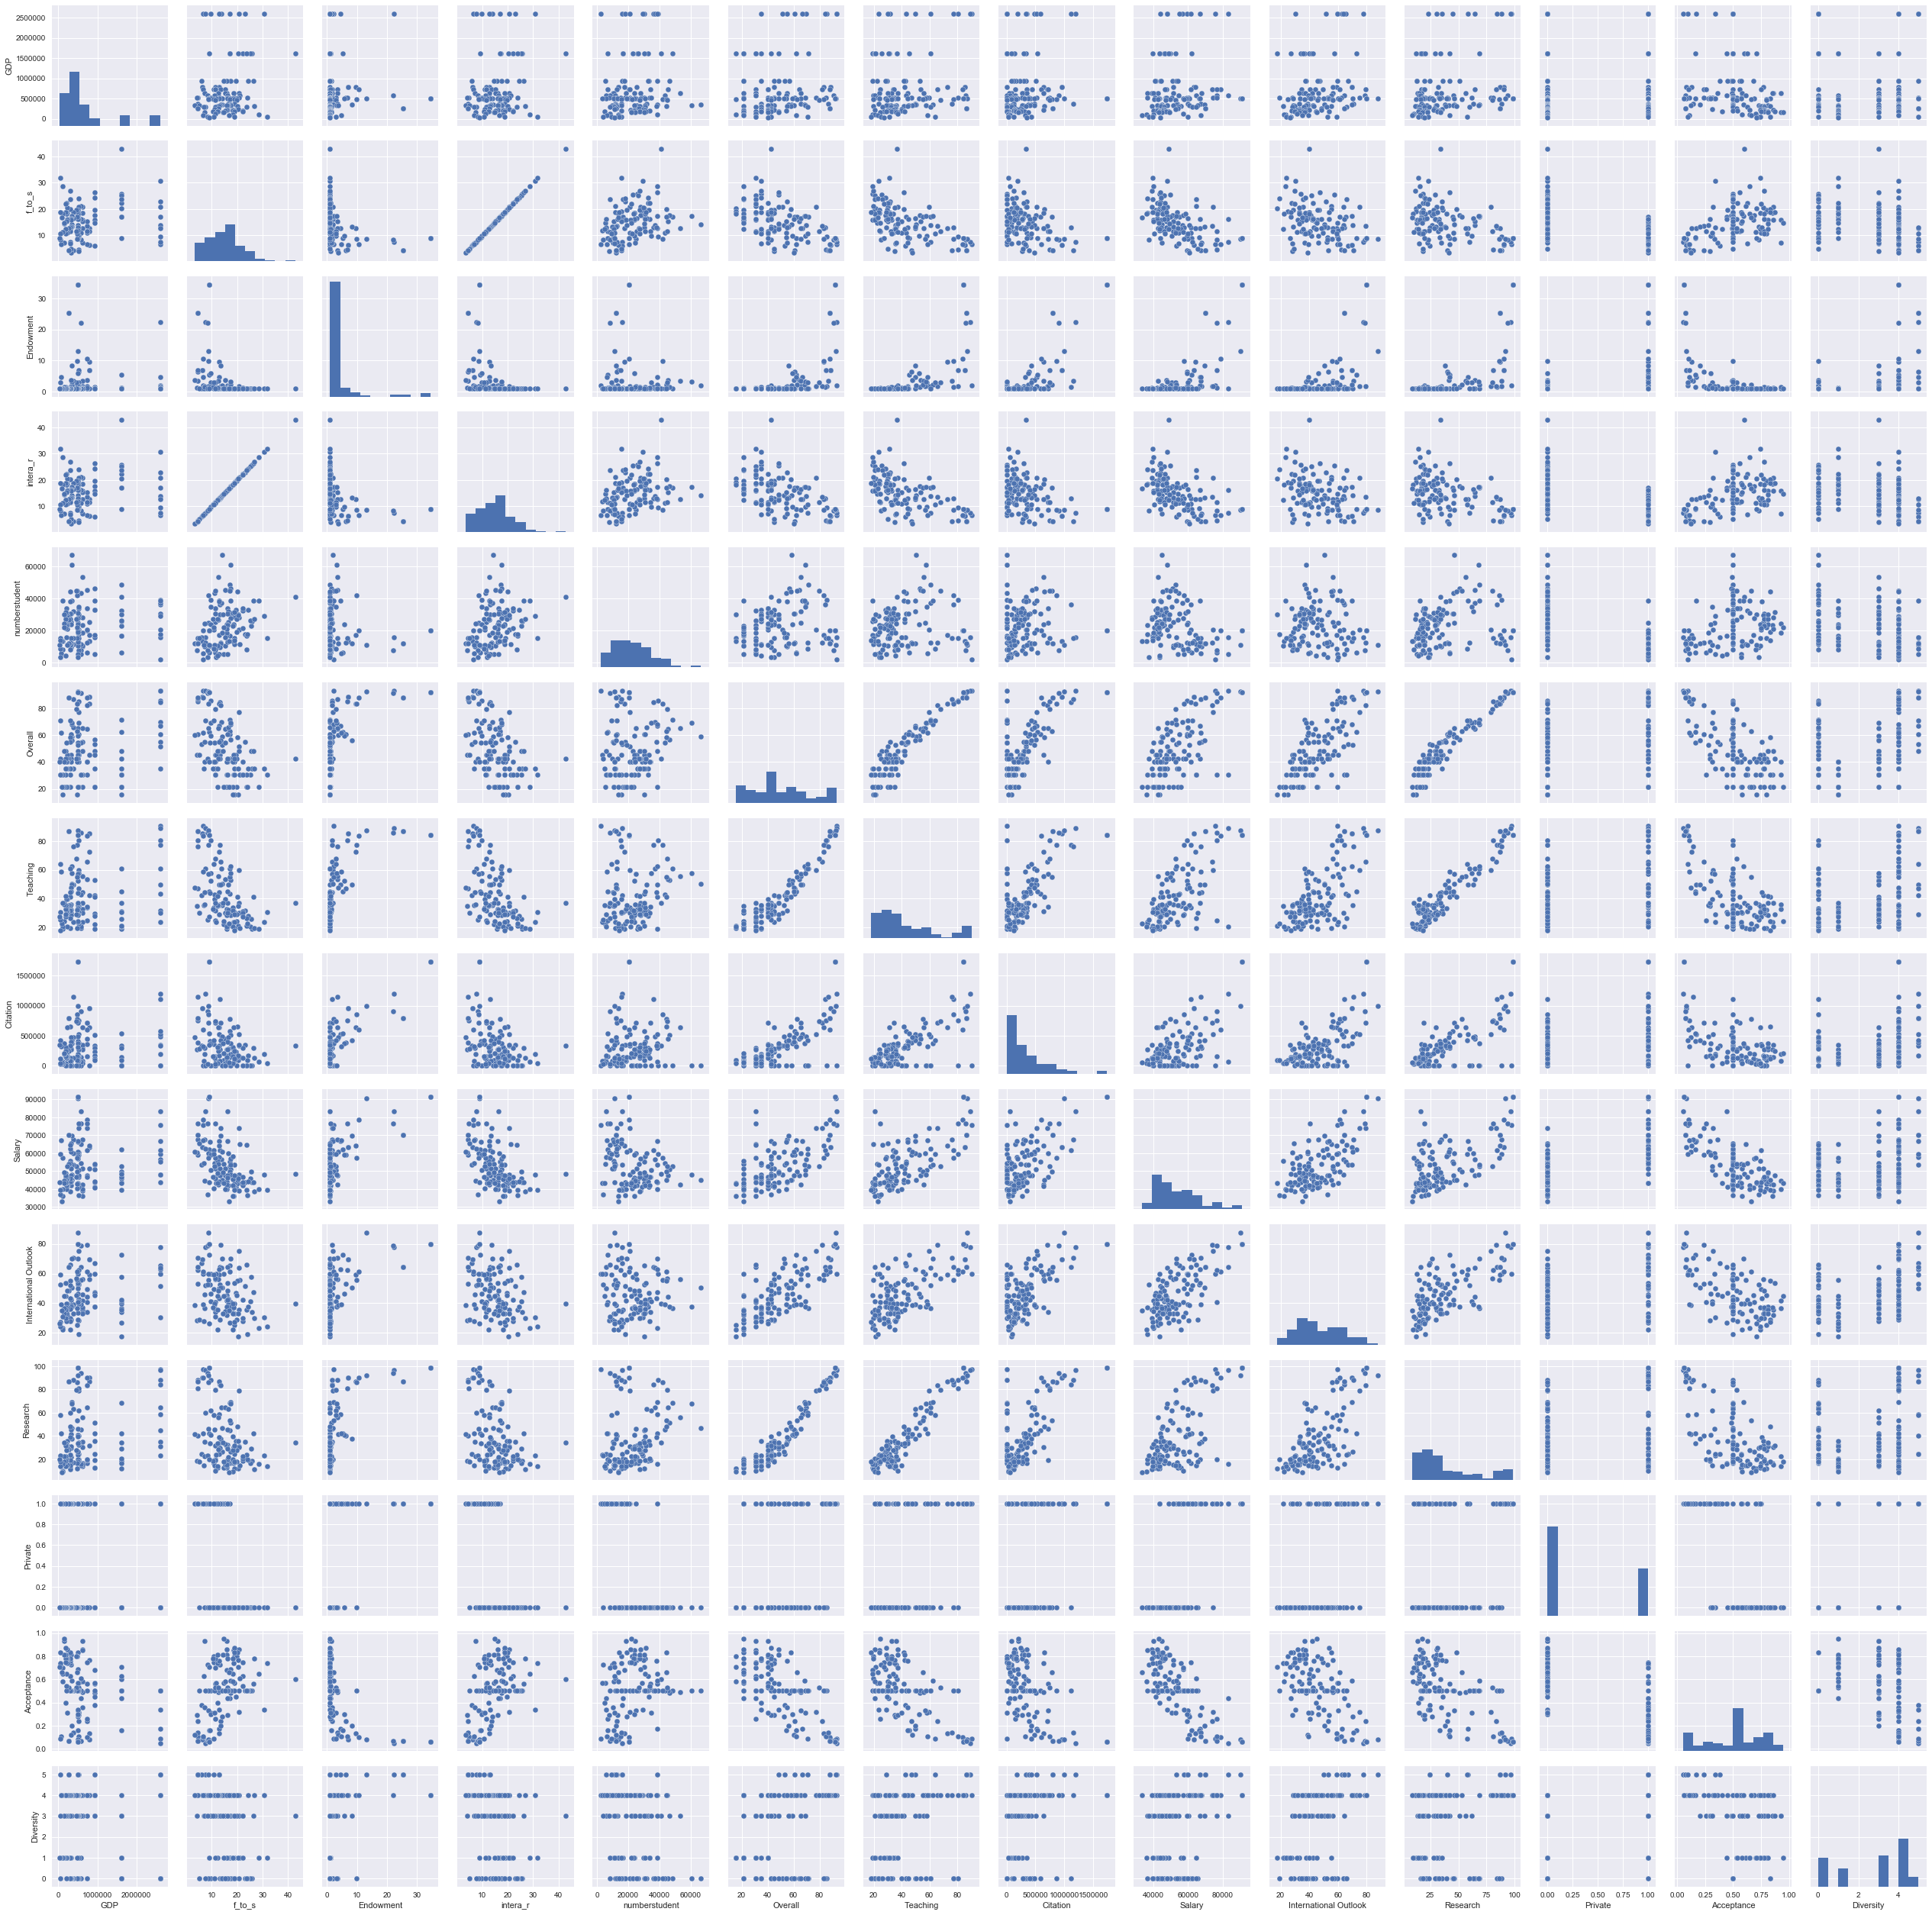

In [96]:
sns.pairplot(smaller_df)

In [ ]:
#Full_model_Regression (Basic) without standardize

In [97]:
X =smaller_df.loc[:,["f_to_s","intera_r","numberstudent","Citation","Salary","GDP","Endowment","Teaching","Research","International Outlook","Private","Acceptance","Diversity"]]
y = smaller_df["Overall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr_model1 = LinearRegression()
lr_model1.fit(X_train,y_train)
list(zip(X_train.columns,lr_model1.coef_))


[('f_to_s', -0.1599324502888412),
 ('intera_r', -0.1599324502839263),
 ('numberstudent', 0.00013198779485437901),
 ('Citation', 3.1700627604101892e-06),
 ('Salary', -3.3036389882544828e-05),
 ('GDP', -6.2108658832604746e-07),
 ('Endowment', -0.35377987698143515),
 ('Teaching', 0.25458608636792723),
 ('Research', 0.44682967054542611),
 ('International Outlook', 0.18953256829686305),
 ('Private', -0.49106842142216028),
 ('Acceptance', -9.3194291353550476),
 ('Diversity', 0.12146578229901955)]

In [98]:
print(lr_model1.score(X_train,y_train))
print(lr_model1.score(X_test,y_test))

0.94651272915
0.944839690789


In [99]:
#Full_model_Regression (Basic) with standardize
std = StandardScaler()
std.fit(X_train)
X_te = std.transform(X_test)
X_tr = std.transform(X_train)

lr_model2 = LinearRegression()
lr_model2.fit(X_tr,y_train)
list(zip(X_train.columns,lr_model2.coef_))

[('f_to_s', -1.0401987325515063),
 ('intera_r', -1.0401987325515041),
 ('numberstudent', 1.7107860159261588),
 ('Citation', 1.1856188226738427),
 ('Salary', -0.42948314938179699),
 ('GDP', -0.37329810013479103),
 ('Endowment', -2.2278729605685634),
 ('Teaching', 4.8506097761415745),
 ('Research', 11.552784415201341),
 ('International Outlook', 2.929336661012929),
 ('Private', -0.2287251789555198),
 ('Acceptance', -2.1378457145650964),
 ('Diversity', 0.20716813622327246)]

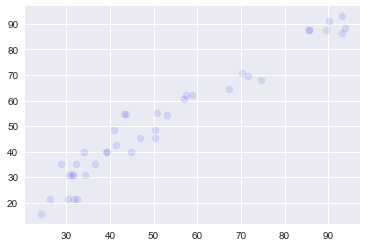

In [100]:
test_set_pred1 = lr_model1.predict(X_test)
plt.scatter(test_set_pred1,y_test,alpha=.1,color = "b")

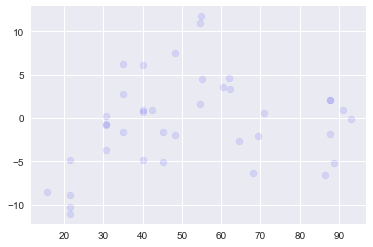

In [101]:
plt.scatter(y_test,y_test-test_set_pred1,alpha=.1,color = "b")

In [102]:
print(lr_model1.score(X_train,y_train))
print(lr_model1.score(X_test,y_test))

0.94651272915
0.944839690789


In [103]:
#Regularization: LASSO
lr_model3 = Lasso(alpha = 10)
selected_columns_1 = ["f_to_s","intera_r","numberstudent","Citation","Salary","GDP","Endowment","Teaching","International Outlook","Research",""]
lr_model3.fit(X_train,y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
list(zip(selected_columns_1,lr_model3.coef_))

[('f_to_s', -0.037424395040830498),
 ('intera_r', -0.0),
 ('numberstudent', 0.00012008030943583392),
 ('Citation', 1.0866234705463908e-06),
 ('Salary', 0.00010569636912946865),
 ('GDP', 1.5516310370854168e-07),
 ('Endowment', -0.0),
 ('Teaching', 0.29349036093818909),
 ('International Outlook', 0.42562293474043),
 ('Research', 0.12776096452040914),
 ('', 0.0)]

In [105]:
print(lr_model3.score(X_train,y_train))
print(lr_model3.score(X_test,y_test))

0.930856434156
0.928372019147


In [106]:
#Cross-Validation
alphavec = 10**np.linspace(-3,9,27)
lr_model4 = LassoCV(alphas = alphavec, cv=3)
lr_model4.fit(X_train,y_train)
lr_model4.alpha_

0.5878016072274912

In [107]:
list(zip(X_train.columns,lr_model4.coef_))

[('f_to_s', -0.31821913925145523),
 ('intera_r', -3.6056206393343595e-15),
 ('numberstudent', 0.00011937584713365511),
 ('Citation', 2.6849655834660976e-06),
 ('Salary', 3.2936032668785142e-05),
 ('GDP', -1.009900934562068e-07),
 ('Endowment', -0.27707952549650011),
 ('Teaching', 0.27415285687722757),
 ('Research', 0.44950132065815218),
 ('International Outlook', 0.19814024259801014),
 ('Private', 0.0),
 ('Acceptance', -0.0),
 ('Diversity', 0.0)]

In [108]:
test_set_pred4 = lr_model4.predict(X_test)

In [109]:
np.sqrt(np.mean((test_set_pred4 - y_test)**2))

5.6853325516465141

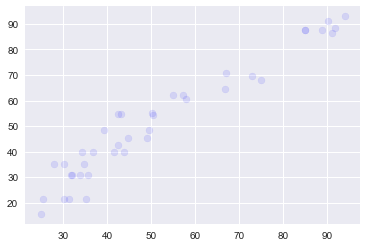

In [110]:
plt.scatter(test_set_pred4,y_test,alpha=.1,color = "b")

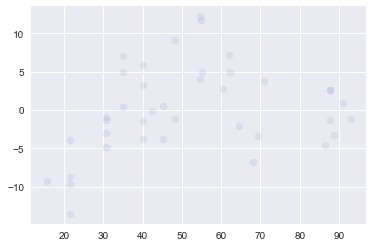

In [111]:
plt.scatter(y_test,y_test-test_set_pred4,alpha=.1)

In [112]:
print(lr_model4.score(X_train,y_train))
print(lr_model4.score(X_test,y_test))

0.942924172875
0.935194247553


In [113]:
#Single Tree
dtrmodel1 = tree.DecisionTreeRegressor(min_samples_split=8, max_depth=4, min_samples_leaf=3)

In [114]:
dtrmodel1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [115]:
tree.export_graphviz(dtrmodel1, out_file='tree.dot',feature_names = X_train.columns)

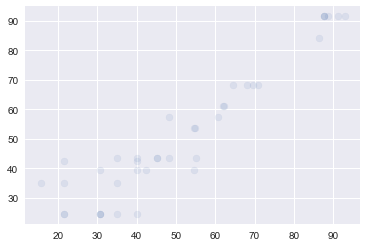

In [116]:
tree_pred_test1 = dtrmodel1.predict(X_test)
plt.scatter(y_test, tree_pred_test1,alpha=.1)

In [117]:
print(dtrmodel1.score(X_train,y_train))
print(dtrmodel1.score(X_test,y_test))

0.971643161306
0.884528639676


In [118]:
list(zip(X_train.columns,dtrmodel1.feature_importances_))

[('f_to_s', 0.0),
 ('intera_r', 0.0),
 ('numberstudent', 0.01452999908155634),
 ('Citation', 0.037981303420712625),
 ('Salary', 0.0),
 ('GDP', 0.0018438837442471636),
 ('Endowment', 0.00091839068861674939),
 ('Teaching', 0.008908849001669444),
 ('Research', 0.93240342605410598),
 ('International Outlook', 0.0034141480090917691),
 ('Private', 0.0),
 ('Acceptance', 0.0),
 ('Diversity', 0.0)]

In [119]:
#Forest
rfmodel2 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=3, max_features=4, n_jobs=-1)##?
rfmodel2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

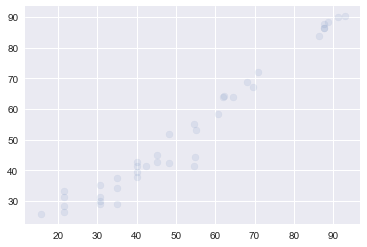

In [120]:
rf1_test_pred2 = rfmodel2.predict(X_test)
plt.scatter(y_test, rf1_test_pred2,alpha=.1)

In [121]:
np.sqrt(np.mean((rf1_test_pred2 - y_test)**2))

4.7181877827561598

In [122]:
print(rfmodel2.score(X_train,y_train))
print(rfmodel2.score(X_test,y_test))

0.974132311648
0.955367392972


In [123]:
list(zip(X_train.columns,rfmodel2.feature_importances_))

[('f_to_s', 0.015326850950623683),
 ('intera_r', 0.015670435171407843),
 ('numberstudent', 0.020104321507011132),
 ('Citation', 0.084494493907398924),
 ('Salary', 0.039695578916159865),
 ('GDP', 0.0068639722427692321),
 ('Endowment', 0.1112962448391399),
 ('Teaching', 0.28561054040523903),
 ('Research', 0.31468838056960458),
 ('International Outlook', 0.063401776499489138),
 ('Private', 0.00043552212060237594),
 ('Acceptance', 0.039340518886615369),
 ('Diversity', 0.0030713639839391)]

In [ ]:
#polynomial model

In [124]:
poly = PolynomialFeatures(2)
X_train_p= poly.fit_transform(X_train)
X_test_p= poly.fit_transform(X_test)

lr_model5 = LinearRegression()
lr_model5.fit(X_train_p,y_train)
test_set_pred5 = lr_model5.predict(X_test_p)

In [125]:
print(lr_model5.score(X_train_p,y_train))
print(lr_model5.score(X_test_p,y_test))

0.999779638929
-1192.3506075


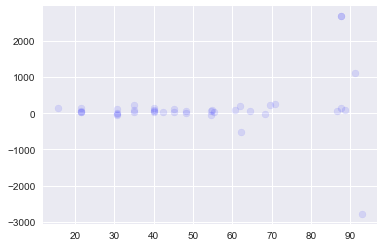

In [126]:
plt.scatter(y_test,test_set_pred5,alpha=.1,color = "b")

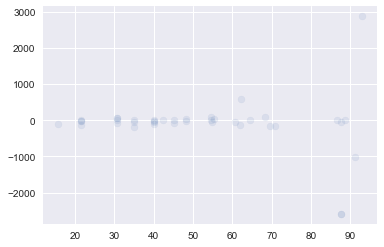

In [127]:
plt.scatter(y_test,y_test-test_set_pred5,alpha=.1)

In [128]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gbmodel1 = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.005, max_depth=3, subsample=.2)
gbmodel1.fit(X_train, y_train)
y_pred_gb1 = gbmodel1.predict(X_test)
np.sqrt(np.mean((y_pred_gb1 - y_test)**2))
list(zip(X_train.columns, gbmodel1.feature_importances_))

[('f_to_s', 0.068332100804668852),
 ('intera_r', 0.063068613488855063),
 ('numberstudent', 0.1023662349846404),
 ('Citation', 0.075872086922861778),
 ('Salary', 0.069951289220058624),
 ('GDP', 0.070732785931345327),
 ('Endowment', 0.023922320835112747),
 ('Teaching', 0.15360203335575234),
 ('Research', 0.15649082709150003),
 ('International Outlook', 0.12240615522666488),
 ('Private', 0.0021280246547021706),
 ('Acceptance', 0.05631211611323985),
 ('Diversity', 0.034815411370597391)]

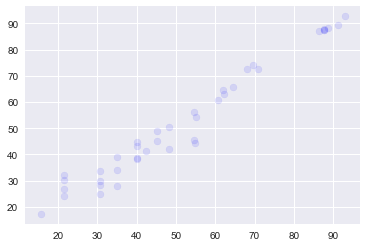

In [129]:
plt.scatter(y_test,y_pred_gb1,alpha=.1,color = "b")

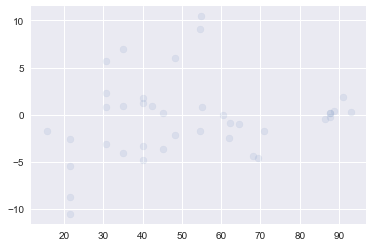

In [131]:
plt.scatter(y_test,y_test-y_pred_gb1,alpha=.1)

In [132]:
print(gbmodel1.r2_score(X_train,y_train))
print(gbmodel1.r2_score(X_test,y_test))

AttributeError: 'GradientBoostingRegressor' object has no attribute 'r2_score'

Remove the three high correlation variables:

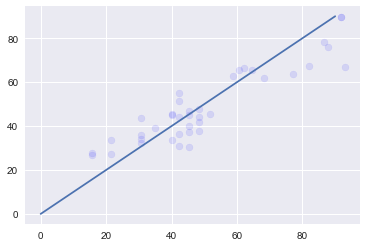

In [133]:
#Regression Basic
X3 =smaller_df.loc[:,["f_to_s","intera_r","numberstudent","Citation","Salary","GDP","Endowment","Private","Acceptance","Diversity"]]
y3 =smaller_df["Overall"]
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.3)
rfmodel3 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=3, max_features=4, n_jobs=-1)
rfmodel3.fit(X_train_3,y_train_3)
rf1_test_pred3 = rfmodel3.predict(X_test_3)
plt.scatter(y_test_3, rf1_test_pred3,alpha=.1,color = "b")
plt.plot(np.linspace(0,90,20),np.linspace(0,90,20))

In [135]:
list(zip(X_train_3.columns,rfmodel3.feature_importances_))

[('f_to_s', 0.04848269536074213),
 ('intera_r', 0.048224667202833936),
 ('numberstudent', 0.063402753796984387),
 ('Citation', 0.27910590267031837),
 ('Salary', 0.11078538727249489),
 ('GDP', 0.016320660676170728),
 ('Endowment', 0.30981751648962136),
 ('Private', 0.0024849298027637867),
 ('Acceptance', 0.10256678211095333),
 ('Diversity', 0.018808704617117346)]

In [136]:
print(rfmodel3.score(X_train_3,y_train_3))
print(rfmodel3.score(X_test_3,y_test_3))

0.923704247942
0.81920092376


In [137]:
#Lasso:
alphavec = 10**np.linspace(-3,9,27)
lr_model5 = LassoCV(alphas = alphavec, cv=3)
lr_model5.fit(X_train_3,y_train_3)
lr_model5.alpha_

0.070170382867038292

In [138]:
list(zip(X_train_3.columns,lr_model5.coef_))

[('f_to_s', -0.80114247433218189),
 ('intera_r', -8.3198307186371623e-15),
 ('numberstudent', 0.00060915149859219286),
 ('Citation', 1.8186835086408449e-05),
 ('Salary', 0.00025546490257345256),
 ('GDP', 9.0917047625459731e-07),
 ('Endowment', 0.40860570814828912),
 ('Private', -2.3620422874836469),
 ('Acceptance', -32.913714532673062),
 ('Diversity', -0.84837237327296378)]

In [139]:
test_set_pred5 = lr_model5.predict(X_test_3)
print(lr_model5.score(X_train_3,y_train_3))
print(lr_model5.score(X_test_3,y_test_3))

0.805086689353
0.638202926413


In [ ]:
sns.pairplot(smaller_df2)

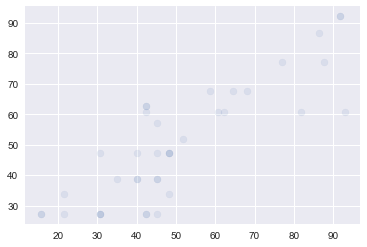

In [140]:
#Single Tree
dtrmodel3 = tree.DecisionTreeRegressor(min_samples_split=8, max_depth=4, min_samples_leaf=3)
dtrmodel3.fit(X_train_3,y_train_3)
tree_pred_test3 = dtrmodel3.predict(X_test_3)
plt.scatter(y_test_3, tree_pred_test3,alpha=.1)

In [141]:
print(dtrmodel3.score(X_train_3,y_train_3))
print(dtrmodel3.score(X_test_3,y_test_3))

0.901144162486
0.714588702766


In [142]:
#Forest
rfmodel4 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=3, max_features=4, n_jobs=-1)
rfmodel4.fit(X_train_3,y_train_3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

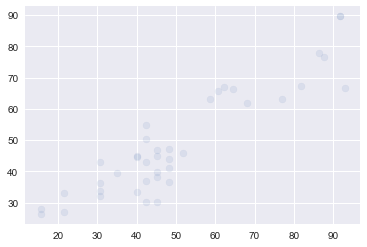

In [143]:
rf1_test_pred4 = rfmodel4.predict(X_test_3)
plt.scatter(y_test_3, rf1_test_pred4,alpha=.1)

In [ ]:
print(rfmodel4.score(X_train_3,y_train_3))
print(rfmodel4.score(X_test_3,y_test_3))

In [144]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gbmodel5 = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.005, max_depth=3, subsample=.2)
gbmodel5.fit(X_train_3, y_train_3)
y_pred_gb1 = gbmodel5.predict(X_test_3)
np.sqrt(np.mean((y_pred_gb1 - y_test_3)**2))
list(zip(X_train_3.columns, gbmodel5.feature_importances_))

[('f_to_s', 0.07835329625872775),
 ('intera_r', 0.076668904935146776),
 ('numberstudent', 0.15325180615863387),
 ('Citation', 0.20054602350496736),
 ('Salary', 0.1296790664184311),
 ('GDP', 0.12463869243436368),
 ('Endowment', 0.070805455820728336),
 ('Private', 0.0056754466570337917),
 ('Acceptance', 0.090888040774506712),
 ('Diversity', 0.069493267037460615)]

In [145]:
print(gbmodel5.score(X_train_3, y_train_3))
print(gbmodel5.score(X_test_3,y_test_3))

0.97521314244
0.785772932223


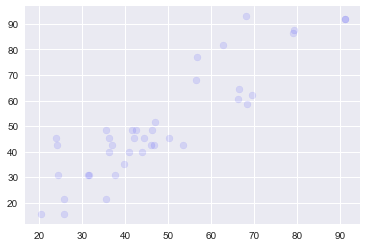

In [146]:
plt.scatter(y_pred_gb1,y_test_3,alpha=.1,color = "b")